# 🕵️ Chapter 9: Unsupervised Learning — Hands-On Guide

Discover patterns and structure in unlabeled data using clustering and more advanced models.

---
## 1. 🧩 Clustering

Clustering algorithms group data points into meaningful clusters based on similarity, without using labels.

---
### A. **K-Means Clustering**

- Partitions data into *K* clusters by minimizing within-cluster variance.
- Sensitive to initial placement and requires specifying *K*.

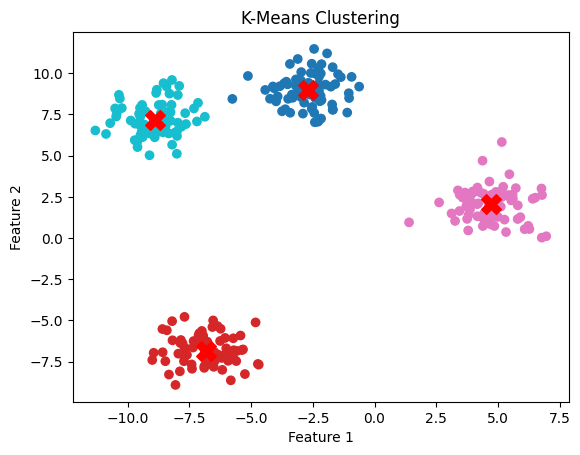

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot the clusters and centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, marker='X', c='red')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
#### 🚧 Limitations of K-Means

- Assumes spherical clusters
- Needs predefined *K*
- Sensitive to outliers

---
### B. Clustering Applications

#### i. Image Segmentation using K-Means

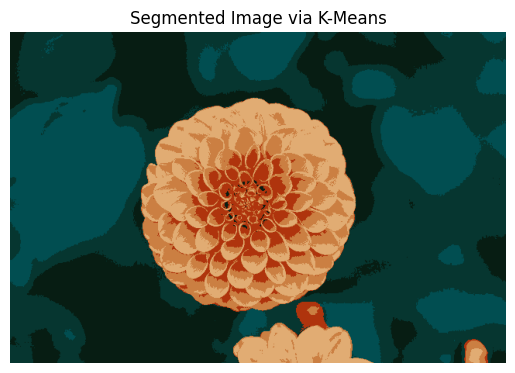

In [2]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt

# Load sample image
flower = load_sample_image("flower.jpg")
X_img = flower.reshape(-1, 3)  # Reshape to (n_pixels, 3)

# Apply KMeans for segmentation
kmeans_img = KMeans(n_clusters=6, random_state=42).fit(X_img)
segmented = kmeans_img.cluster_centers_[kmeans_img.labels_]
segmented_image = segmented.reshape(flower.shape).astype(np.uint8)

# Plot segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.title("Segmented Image via K-Means")
plt.show()

#### ii. Preprocessing & Semi-Supervised Learning

*Cluster labels can serve as features or pseudo-labels for unlabeled data.*

---
### C. Density-Based Clustering with DBSCAN

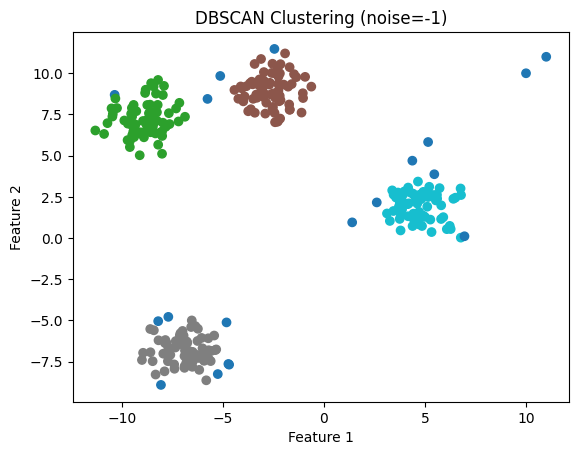

In [3]:
from sklearn.cluster import DBSCAN
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)
X_blobs = list(X_blobs) + [(10, 10), (11, 11)]  # Add some outliers

db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X_blobs)

plt.scatter(*zip(*X_blobs), c=labels, cmap='tab10')
plt.title("DBSCAN Clustering (noise=-1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
## 2. 🌟 Gaussian Mixture Models (GMM)

- Probabilistic clusters: soft assignments.
- Handles overlapping clusters.
- Useful for density estimation.

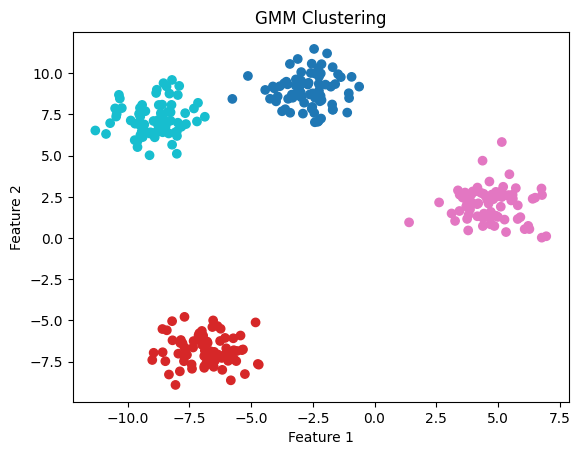

In [4]:
from sklearn.mixture import GaussianMixture

# Fit GMM with 4 components
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 🕵️ Using GMM for Anomaly Detection

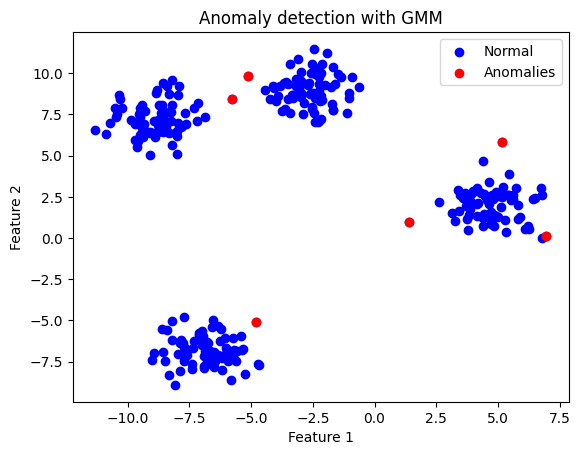

In [5]:
# Compute the log-likelihood of each sample
probs = gmm.score_samples(X)
# Threshold at 2nd percentile
threshold = np.percentile(probs, 2)
anomalies = X[probs < threshold]

# Plot anomalies
plt.scatter(X[:,0], X[:,1], c='blue', label='Normal')
plt.scatter(anomalies[:,0], anomalies[:,1], c='red', label='Anomalies')
plt.legend()
plt.title("Anomaly detection with GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
### 🧮 Choosing Number of Components with BIC

In [ ]:
import numpy as np
n_components = np.arange(1, 8)
models = [GaussianMixture(n, random_state=42).fit(X) for n in n_components]
bics = [m.bic(X) for m in models]

plt.plot(n_components, bics, marker='o')
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.title("GMM Model Selection")
plt.show()

---
## 3. 🧩 Other Anomaly Detection Techniques

- **One-Class SVM**: Learns the boundary of normal data.
- **Isolation Forest**: Random splits to isolate anomalies.

Use these for anomaly detection tasks.

---
## Summary Table

| Method | Use Cases |
| --- | --- |
| K-Means | Spherical clusters, known *K* |
| DBSCAN | Arbitrary shapes, outliers |
| GMM | Overlapping, probabilistic |
| Bayesian GMM | Automatic complexity |
| One-Class SVM / Isolation Forest | Anomaly detection |

Choose based on data shape, size, and whether you want probabilistic outputs.

---
## 🔧 Exercises

1. Segment an image with K-Means.
2. Compare K-Means and GMM on synthetic data.
3. Use DBSCAN on non-convex clusters.
4. Fit GMM on high-dimensional data, evaluate likelihood.
5. Detect anomalies with GMM or Isolation Forest.